<a href="https://colab.research.google.com/github/saxenapranav9/Autoencoder/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Pranav Saxena 

Student_Id: 119220273


# ***Declaration:***

By submitting this exam, I declare

(1) that all work of it is my own;

(2) that I did not seek whole or partial solutions for any part of my submission from others; and

(3) that I did not and will not discuss, exchange, share, or publish complete or partial solutions for this exam or any part of it.

# <div align="center">Task-1</div>

 Loading the necessary tensorflow packages required to run the project

## ***Dense mode given***

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from keras import regularizers
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
print('TensorFlow version:', tf.__version__)
print('Is Executing Eagerly?', tf.executing_eagerly())

TensorFlow version: 2.2.0-rc3
Is Executing Eagerly? True


Using TensorFlow backend.


Task1:
There are 2 dense encoders and decoders namely:

*   encoder1 and decoder1 followed by autoencoder1
*   encoder2 and decoder2 followed by autoencoder2


For CNN's:


*   CNN-model -1
*   CNN-model -2









In [0]:
def loss(preds, real):
  return tf.reduce_mean(tf.square(tf.subtract(preds, real)))

In [0]:
def train(loss, model, opt, original):
  with tf.GradientTape() as tape:
    preds = model(original)
    reconstruction_error = loss(preds, original)
  gradients = tape.gradient(reconstruction_error, model.trainable_variables)
  gradient_variables = zip(gradients, model.trainable_variables)
  opt.apply_gradients(gradient_variables)
  
  return reconstruction_error

In [0]:
def train_loop(model, opt, loss, dataset, epochs):
  for epoch in range(epochs):
    epoch_loss = 0
    for step, batch_features in enumerate(dataset):
      loss_values = train(loss, model, opt, batch_features)
      epoch_loss += loss_values
    model.loss.append(epoch_loss)
    print('Epoch {}/{}. Loss: {}'.format(epoch + 1, epochs, epoch_loss.numpy()))

In [0]:
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train / 255.
#CHANGE DONE : Normalized the test set
x_test = x_test / 255.

x_train = x_train.astype(np.float32)
# CHANGE DONE : changed to float 32
x_test = x_test.astype(np.float32)
x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))

training_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(256)

### ***Encoder Given***

In [0]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
    
    def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return self.output_layer(activation)

### ***Decoder Given***

In [0]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        activation = self.hidden_layer(code)
        return self.output_layer(activation)

### ***Autoencoder Given***

In [0]:
class Autoencoder(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder, self).__init__()
    self.loss = []
    self.encoder = Encoder(intermediate_dim=intermediate_dim)
    self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

## Dense model-1

### ***Encoder1***


# *Changes Done:*

 *1.   Added sparsity constraint to the encoded representation*
 
 *2.   Activation function of the decoder is changed to Sigmoid from Relu*




In [0]:
class Encoder1(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder1, self).__init__()
        #CHANGE DONE : added sparsity constraint to the encoded representation
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu,activity_regularizer=regularizers.l1(10e-8))
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
    
    def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return self.output_layer(activation)

### ***Decoder1***

In [0]:
class Decoder1(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder1, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        #CHANGE DONE : changed the activation function of output layer to sigmoid
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        activation = self.hidden_layer(code)
        return self.output_layer(activation)

### ***Autoencoder-1***

In [0]:
class Autoencoder1(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder1, self).__init__()
    self.loss = []
    self.encoder1 = Encoder1(intermediate_dim=intermediate_dim)
    self.decoder1 = Decoder1(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder1(input_features)
    reconstructed = self.decoder1(code)
    return reconstructed

##Dense Model-2

### ***Encoder2***

# ***Changes Done:***


1.   *Added sparsity constraint to the encoded representation*
2.   *Added three layers of dimensions dim_lst = [512,256,128]*
3.   *Modified the activation function to Sigmoid from Relu*



In [0]:
class Encoder2(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder2, self).__init__()
        
        #CHANGE DONE : added sparsity constraint to the encoded representation
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim[0],activation=tf.nn.relu,activity_regularizer=regularizers.l1(10e-8))
        #CHANGE DONE :  added one more hidden layer
        self.hidden_layer1 = tf.keras.layers.Dense(units=intermediate_dim[1])
        self.hidden_layer2 = tf.keras.layers.Dense(units=intermediate_dim[2])
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim[2], activation=tf.nn.relu)
    
    def call(self, input_features):
        activation = self.hidden_layer(input_features)
        activation = self.hidden_layer1(activation)
        activation = self.hidden_layer2(activation)
        return self.output_layer(activation)

### ***Decoder2***



In [0]:
class Decoder2(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder2, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim[2], activation=tf.nn.relu)
        #CHANGE DONE :  added one more hidden layer
        self.hidden_layer1 = tf.keras.layers.Dense(units=intermediate_dim[1])
        self.hidden_layer2 = tf.keras.layers.Dense(units=intermediate_dim[0])
        #CHANGE DONE : changed the activation function of output layer to sigmoid
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.sigmoid)
  
    def call(self, code):
        activation = self.hidden_layer(code)
        activation = self.hidden_layer1(activation)
        activation = self.hidden_layer2(activation)
        return self.output_layer(activation)

### ***Autoencoder2***

In [0]:
class Autoencoder2(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder2, self).__init__()
    self.loss = []
    self.encoder2 = Encoder2(intermediate_dim=intermediate_dim)
    self.decoder2 = Decoder2(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder2(input_features)
    reconstructed = self.decoder2(code)
    return reconstructed

## ***Autoencoder-Model-Given***

In [0]:
model = Autoencoder(intermediate_dim=128, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)

train_loop(model, opt, loss, training_dataset, 100)

Epoch 1/100. Loss: 10.173213958740234
Epoch 2/100. Loss: 6.495486736297607
Epoch 3/100. Loss: 6.020676136016846
Epoch 4/100. Loss: 5.820195198059082
Epoch 5/100. Loss: 5.6336259841918945
Epoch 6/100. Loss: 5.470587730407715
Epoch 7/100. Loss: 5.409506797790527
Epoch 8/100. Loss: 5.301096439361572
Epoch 9/100. Loss: 5.247762203216553
Epoch 10/100. Loss: 5.20855188369751
Epoch 11/100. Loss: 5.162601470947266
Epoch 12/100. Loss: 5.145681381225586
Epoch 13/100. Loss: 5.138146877288818
Epoch 14/100. Loss: 5.155308246612549
Epoch 15/100. Loss: 5.136497497558594
Epoch 16/100. Loss: 5.12827730178833
Epoch 17/100. Loss: 5.086170196533203
Epoch 18/100. Loss: 5.061072826385498
Epoch 19/100. Loss: 5.063013553619385
Epoch 20/100. Loss: 5.05237340927124
Epoch 21/100. Loss: 5.042271614074707
Epoch 22/100. Loss: 5.0233306884765625
Epoch 23/100. Loss: 5.007180213928223
Epoch 24/100. Loss: 4.9863200187683105
Epoch 25/100. Loss: 5.001897811889648
Epoch 26/100. Loss: 4.996500492095947
Epoch 27/100. Loss: 

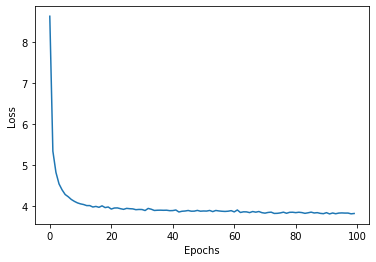

In [0]:
plt.plot(range(100), model1.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

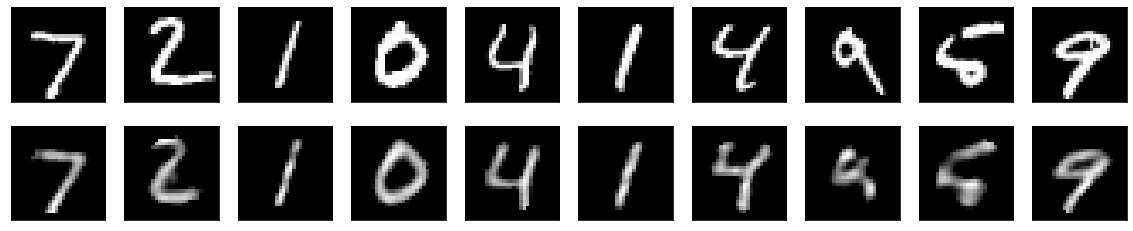

In [0]:
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model1(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## ***Autoencoder-Model1***

In [0]:
model1 = Autoencoder1(intermediate_dim=128, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)

train_loop(model1, opt, loss, training_dataset, 100)

Epoch 1/100. Loss: 8.630266189575195
Epoch 2/100. Loss: 5.33911657333374
Epoch 3/100. Loss: 4.8206562995910645
Epoch 4/100. Loss: 4.540701389312744
Epoch 5/100. Loss: 4.39460563659668
Epoch 6/100. Loss: 4.281617164611816
Epoch 7/100. Loss: 4.226805210113525
Epoch 8/100. Loss: 4.16044282913208
Epoch 9/100. Loss: 4.114221572875977
Epoch 10/100. Loss: 4.077033519744873
Epoch 11/100. Loss: 4.0527801513671875
Epoch 12/100. Loss: 4.0368547439575195
Epoch 13/100. Loss: 4.011054039001465
Epoch 14/100. Loss: 4.011348724365234
Epoch 15/100. Loss: 3.9763903617858887
Epoch 16/100. Loss: 3.9909846782684326
Epoch 17/100. Loss: 3.969095468521118
Epoch 18/100. Loss: 4.0050740242004395
Epoch 19/100. Loss: 3.962078809738159
Epoch 20/100. Loss: 3.976919412612915
Epoch 21/100. Loss: 3.9269957542419434
Epoch 22/100. Loss: 3.95190167427063
Epoch 23/100. Loss: 3.9542479515075684
Epoch 24/100. Loss: 3.935610055923462
Epoch 25/100. Loss: 3.9193129539489746
Epoch 26/100. Loss: 3.943364381790161
Epoch 27/100. Lo

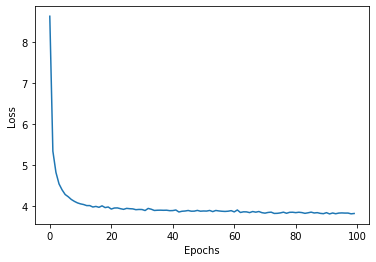

In [0]:
plt.plot(range(100), model1.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

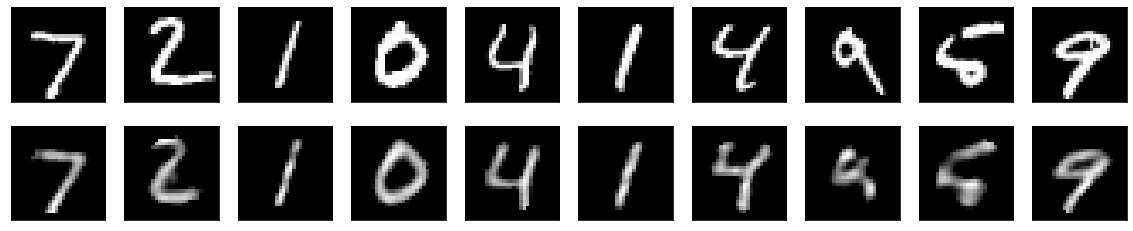

In [0]:
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model1(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### ***Conclusion from dense model-1***

By adding the sparsity parameter we added contrain to the hidden representations, so fewer units would "fire" at a given time.

Changing the activation function to relu because it exists between (0 to 1). Here we have normalized the images to black and white i.e. between 0 and 1.



## ***Autoencoder-Model-2***

In [0]:
dim_list = [512,256,128]
model2 = Autoencoder2(intermediate_dim=dim_list, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)

train_loop(model2, opt, loss, training_dataset, 100)

Epoch 1/100. Loss: 17.663429260253906
Epoch 2/100. Loss: 8.302787780761719
Epoch 3/100. Loss: 6.032674312591553
Epoch 4/100. Loss: 4.872006893157959
Epoch 5/100. Loss: 4.163496971130371
Epoch 6/100. Loss: 3.693542957305908
Epoch 7/100. Loss: 3.3551831245422363
Epoch 8/100. Loss: 3.0998270511627197
Epoch 9/100. Loss: 2.87876033782959
Epoch 10/100. Loss: 2.6886656284332275
Epoch 11/100. Loss: 2.527622938156128
Epoch 12/100. Loss: 2.4007046222686768
Epoch 13/100. Loss: 2.2917380332946777
Epoch 14/100. Loss: 2.192174196243286
Epoch 15/100. Loss: 2.100431203842163
Epoch 16/100. Loss: 2.0219779014587402
Epoch 17/100. Loss: 1.9439582824707031
Epoch 18/100. Loss: 1.8718394041061401
Epoch 19/100. Loss: 1.8058428764343262
Epoch 20/100. Loss: 1.7514336109161377
Epoch 21/100. Loss: 1.7010526657104492
Epoch 22/100. Loss: 1.6536237001419067
Epoch 23/100. Loss: 1.6098250150680542
Epoch 24/100. Loss: 1.5674558877944946
Epoch 25/100. Loss: 1.5275055170059204
Epoch 26/100. Loss: 1.4907264709472656
Epoch

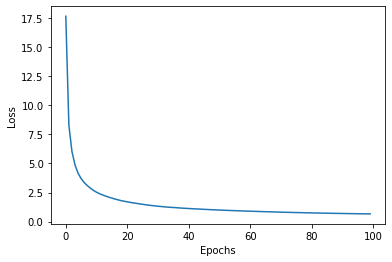

In [0]:
plt.plot(range(100), model2.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

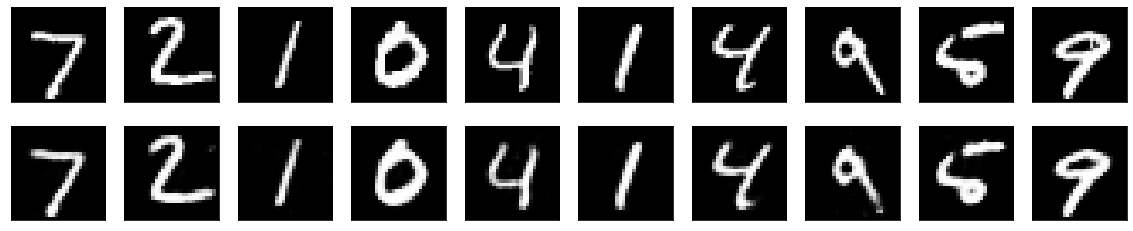

In [0]:
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model2(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### ***Conclusions from dense model-2***

Changing
Adding more layers to the network made it dense, and more efficient output is achieved. By making more dense network of different layers(512,256,128), the model is being made to train on more number of neurons. Hence it resulted in more cleaer image than the dense model-1.



## ***Convolutional Neural Network***

### ***CNN model given***

In [0]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=[RootMeanSquaredError()])

In [0]:
autoencoder.summary()

In [0]:
# to train this model we will with original MNIST digits with shape (samples, 3, 28, 28) and we will just normalize pixel values between 0 and 1
# (x_train, _), (x_test, _) = load_data('../input/mnist.npz')
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [0]:
autoencoder.fit(x_train, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 4s 8ms/step - loss: 0.6889 - val_loss: 0.6875
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 0.6857 - val_loss: 0.6835
Epoch 3/100
469/469 [==============================] - 3s 7ms/step - loss: 0.6806 - val_loss: 0.6771
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 0.6715 - val_loss: 0.6641
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 0.6489 - val_loss: 0.6258
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 0.5719 - val_loss: 0.5110
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: 0.4857 - val_loss: 0.4797
Epoch 8/100
469/469 [==============================] - 3s 7ms/step - loss: 0.4692 - val_loss: 0.4673
Epoch 9/100
469/469 [==============================] - 3s 7ms/step - loss: 0.4566 - val_loss: 0.4542
Epoch 10/100
469/469 [==============================] - 3s 7ms/step - loss: 0.4430 - val_lo

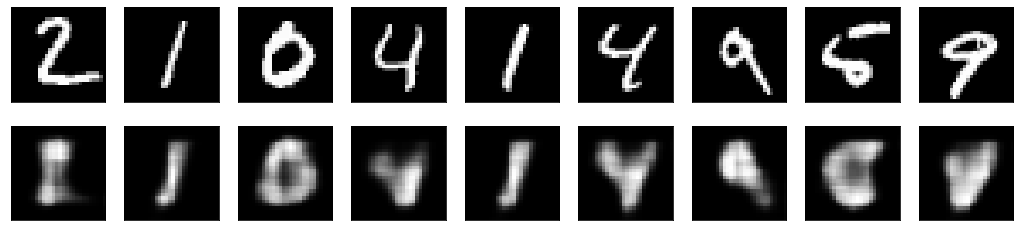

In [0]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### ***CNN-model-1***

# ***Changes Done:***

1.   Modified the filters to 32,16,8 
2.   Changed the optimizer to Adam




In [0]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

# modified the number of filters in each layer to 32,16,8

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
#CHANGE DONE : changed the optimizer to Adam
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [0]:
# to train this model we will with original MNIST digits with shape (samples, 3, 28, 28) and we will just normalize pixel values between 0 and 1
# (x_train, _), (x_test, _) = load_data('../input/mnist.npz')
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [0]:
autoencoder.fit(x_train, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 5s 10ms/step - loss: 0.1910 - val_loss: 0.1335
Epoch 2/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1250 - val_loss: 0.1171
Epoch 3/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1147 - val_loss: 0.1102
Epoch 4/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1092 - val_loss: 0.1056
Epoch 5/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1055 - val_loss: 0.1023
Epoch 6/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1025 - val_loss: 0.1017
Epoch 7/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1004 - val_loss: 0.0993
Epoch 8/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0988 - val_loss: 0.0968
Epoch 9/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0974 - val_loss: 0.0959
Epoch 10/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0961 - val_l

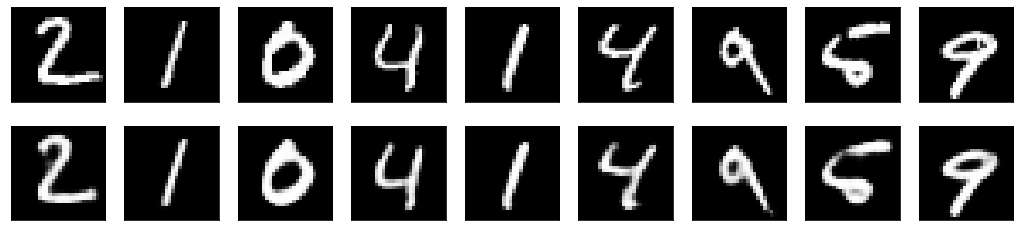

In [0]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### ***Conclusions from CNN model-1***

By adding more layers to the neural network, made it possible to extract more and more features from the given input image. The advantage of multiple layers is that they can learn features at various levels of abstraction.
Adam has performed better as it is a combination of RMSprop and Stochastic Gradient Descent with momentum

### *CNN- Model-2*

# ***Changes Done:***

1.   Modified the filter size to 64,64,32
2.   Chnaged th eoptimizer to Adam




In [0]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

# modified the number of filters in each layer to 64,64,32
# changed optimizer to adam

x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
#CHANGE DONE : changed the optimizer to Adam
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=[RootMeanSquaredError()])

In [0]:
# to train this model we will with original MNIST digits with shape (samples, 3, 28, 28) and we will just normalize pixel values between 0 and 1
# (x_train, _), (x_test, _) = load_data('../input/mnist.npz')
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [0]:
autoencoder.fit(x_train, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 5s 10ms/step - loss: 0.1390 - val_loss: 0.0979
Epoch 2/100
469/469 [==============================] - 4s 10ms/step - loss: 0.0914 - val_loss: 0.0852
Epoch 3/100
469/469 [==============================] - 4s 10ms/step - loss: 0.0842 - val_loss: 0.0810
Epoch 4/100
469/469 [==============================] - 4s 10ms/step - loss: 0.0808 - val_loss: 0.0786
Epoch 5/100
469/469 [==============================] - 4s 10ms/step - loss: 0.0787 - val_loss: 0.0767
Epoch 6/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0772 - val_loss: 0.0753
Epoch 7/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0760 - val_loss: 0.0746
Epoch 8/100
469/469 [==============================] - 4s 10ms/step - loss: 0.0750 - val_loss: 0.0738
Epoch 9/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0742 - val_loss: 0.0730
Epoch 10/100
469/469 [==============================] - 4s 10ms/step - loss: 0.0737 

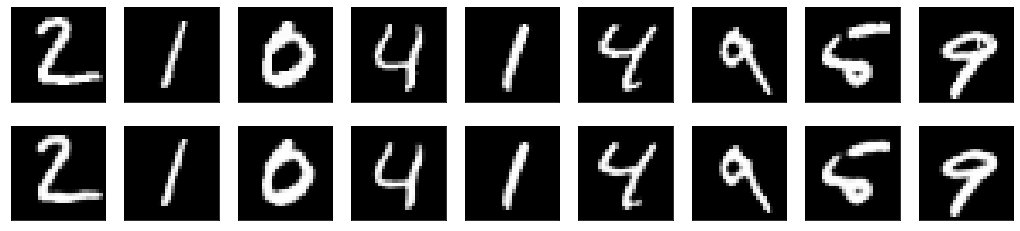

In [0]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### ***Conclusions from CNN-model-2***

Again increasing the number of filters(64,64,32), enhanced the performance of the model by extracting more relevant features needed. Multiple layers are much better at generalizing because they learn all the intermediate features between the raw data and the high-level classification.


## ***Results from Task-1***


*   The modified Dense neural network with more layers helped in minimising the validation loss to **val_loss: 0.1936**
*   The image gets more clearer when Convolutional network is used rather than dense. The validation loss has been reduced to **val_loss: 0.0650**
*   The model has been able to converge well in 100 epochs.




## ***Comparision between Different dense model used***



*   The given dense model has performed below average and can be improved.
*   In the Dense model-1 and dense model-2 by changing the optimizer and the   number of neurons has enhanced the performance of the model. The model was able to pick the relevat featrues and reconstruct them while decoding the image.



## ***Comparision between different CNN models***


*   The given CNN model did not perform aqequately to reconstruct the image.
*   Increasing the filter size made it possible to extract more features while compressing the image, which in turn helped in reconstructing the image with the relevant parameters.
*   The sigmoid activation functions performed better than Relu
 



## ***Comparision between Dense and Convolutional model***



*   Convolutional models has performed better in comoressing and decompressing the image than dense models.
*   Running the model for 100 epochs made the model learn again and again which has decreased the loss in the models.
*   CNN learns the filters automatically without mentioning it explicitly. These filters help in extracting the right and relevant features from the input data.
*   Using the Adam optimizer helped in improving th loss while reconstructing the image.



 # <div align="center">Task-2</div>

In [0]:

from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 784))
x_test = np.reshape(x_test, (len(x_test), 784))

# Introduce noise with a probability factor of 0.5
noise_factor = 0.5
x_train_noisy = x_train + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

x_train_noisy = x_train_noisy.astype(np.float32)
# CHANGE DONE : changed to float 32
x_test_noisy = x_test_noisy.astype(np.float32)
x_train_noisy = np.reshape(x_train_noisy, (x_train_noisy.shape[0], 784))
x_test_noisy = np.reshape(x_test_noisy, (x_test_noisy.shape[0], 784))

11493376/11490434 [==============================] - 0s 0us/step


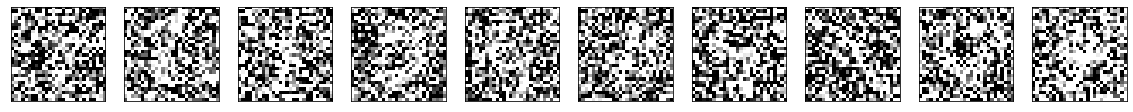

In [0]:
# Plot figures to show what the noisy digits look like
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## *Dense network*

# ***Changes Done:***


*   Added dense layers of 512,256,128 in encoder and 128,256,512 in decoder.
*   The optimizer used here is Adam



In [0]:
input_img = tf.keras.layers.Input(shape=(784,)) 

encoding_dim = 512
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img)
encoded = tf.keras.layers.Dense(256, activation='relu')(encoded)
encoded = tf.keras.layers.Dense(128, activation='relu')(encoded)

decoded = tf.keras.layers.Dense(128, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(256, activation='relu')(decoded)
decoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(decoded)
decoded = tf.keras.layers.Dense(784, activation='relu')(decoded)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [0]:
autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test_noisy, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0568 - val_loss: 0.0476
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0436 - val_loss: 0.0423
Epoch 3/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0405 - val_loss: 0.0398
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0385 - val_loss: 0.0382
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0369 - val_loss: 0.0372
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0359 - val_loss: 0.0366
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0350 - val_loss: 0.0361
Epoch 8/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0343 - val_loss: 0.0356
Epoch 9/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0335 - val_loss: 0.0355
Epoch 10/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0328 - val_lo

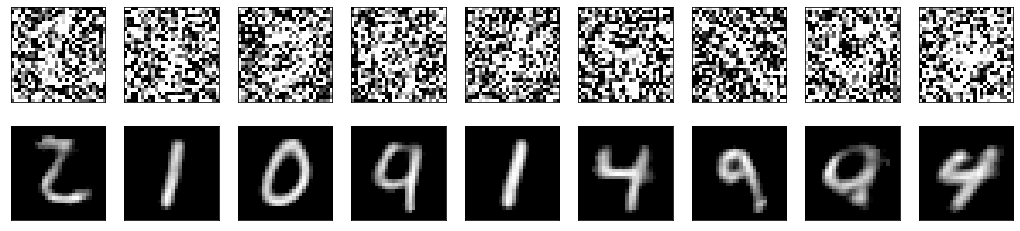

In [0]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## ***De-noising CNN***

# ***Changes done:***

*   Added 3 convolutional layer of 32,64,32 and 3 max pooling layer in the network for encoder.
*   Added 3 convolutional layer of 32,64,32 and 3 max pooling layer in the network for decoder.
*   The optimizer used is Adam.





In [0]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


In [0]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

# modified the number of filters in each layer to 32,64,32
# changed optimizer to adam

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Dropout(rate=0.2)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Dropout(rate=0.2)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)

encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.BatchNormalization()(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
#CHANGE DONE : changed the optimizer to Adam

autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2), loss='binary_crossentropy', metrics=[RootMeanSquaredError()])

In [0]:
autoencoder.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_35 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
dropout_33 (Dropout)         (None, 14, 14, 64)        0  

In [0]:
# This will train for 100 epochs
autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=50, 
                shuffle=True, validation_data=(x_test_noisy, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/tb', histogram_freq=0, write_graph=False)])


Epoch 1/100
1200/1200 [==============================] - 24s 20ms/step - loss: 0.1807 - root_mean_squared_error: 0.1954 - val_loss: 0.1620 - val_root_mean_squared_error: 0.1797
Epoch 2/100
1200/1200 [==============================] - 24s 20ms/step - loss: 0.1651 - root_mean_squared_error: 0.1821 - val_loss: 0.1618 - val_root_mean_squared_error: 0.1785
Epoch 3/100
1200/1200 [==============================] - 24s 20ms/step - loss: 0.1618 - root_mean_squared_error: 0.1791 - val_loss: 0.1615 - val_root_mean_squared_error: 0.1782
Epoch 4/100
1200/1200 [==============================] - 24s 20ms/step - loss: 0.1598 - root_mean_squared_error: 0.1773 - val_loss: 0.1614 - val_root_mean_squared_error: 0.1794
Epoch 5/100
1200/1200 [==============================] - 24s 20ms/step - loss: 0.1584 - root_mean_squared_error: 0.1761 - val_loss: 0.1562 - val_root_mean_squared_error: 0.1749
Epoch 6/100
1200/1200 [==============================] - 24s 20ms/step - loss: 0.1579 - root_mean_squared_error: 0.

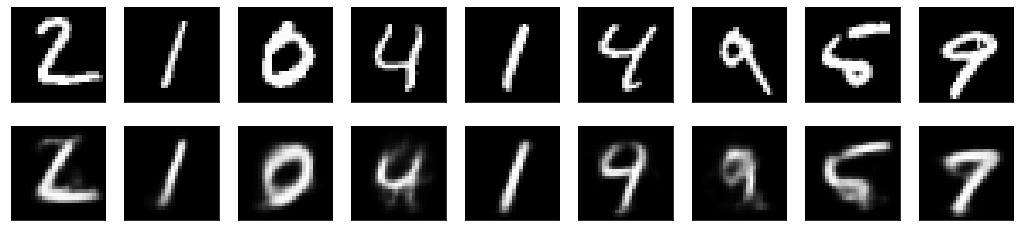

In [0]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    # plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## ***Results from Task-2***


*   The loss of the Dense network was **0.0390** (MSE) whereas loss of the CNN architecture was **0.1703** (Binary Crossentropy).
*   The Dense network was not able to reproduce the image perfectly but the decoded images were comparitively clearer than the Convolution network.



## ***Conclusions from Task-2***


*   Dense network has performed better.
*   Convolutional network with batch normalization after the output of every activation results in standardizing the image again and again between 0 and 1.
*  Dropout of 0.2 is assiting the model to not to overfit on the training data.
*  Adding more layers in the convolutional model, slows down the training time for the model but results in extracting more detailed features, thereby resulting in a comparitively lower test loss.



# <div align="center">Task-3</div>

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import os
from pathlib import Path
import glob
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imsave
from keras.preprocessing.image import load_img, array_to_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Input
from keras.optimizers import SGD, Adam, Adadelta, Adagrad
from keras import backend as K
from sklearn.model_selection import train_test_split
np.random.seed(111)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
   

## ***Upload the files to the G-drive before running the below code:***



1.   The train.zip,test.zip,train_cleaned.zip file has to be uploaded to the Gmail drive. 
2.   Please select the gmail drive on which the images has been uploaded and put the password in the box provided.
3.   Run the remaining steps to load the image and process it.



In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
fid_train = drive.ListFile({'q':"title='train.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid_train})
f.GetContentFile('train.zip')

fid_test = drive.ListFile({'q':"title='test.zip'"}).GetList()[0]['id']
f1 = drive.CreateFile({'id': fid_test})
f1.GetContentFile('test.zip')

fid_clean = drive.ListFile({'q':"title='train_cleaned.zip'"}).GetList()[0]['id']
f2 = drive.CreateFile({'id': fid_clean})
f2.GetContentFile('train_cleaned.zip')

!unzip train.zip
!unzip test.zip
!unzip train_cleaned.zip

import os
PATH1 = '/content/'
PATH2 = '/content/'
PATH3 = '/content/'
os.listdir(PATH1)
os.listdir(PATH2)
os.listdir(PATH3)

train_dir = os.path.join(PATH1,
                         'train')
test_dir = os.path.join(PATH2,
                        'test')
train_cleaned_dir = os.path.join(PATH3,
                        'train_cleaned')



In [0]:
X = []
Y = []
images_train = os.listdir(train_dir)

clean_images = os.listdir(train_cleaned_dir)

for img in images_train:
    img = load_img(train_dir + "/" + img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    X.append(img)

for img in clean_images:
    img = load_img(train_cleaned_dir + "/" + img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    Y.append(img)

x_test =[]

test_images = os.listdir(test_dir)

for img in test_images:
    img = load_img(test_dir + "/" + img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    x_test.append(img)

x_test = np.array(x_test)

X = np.array(X)
Y = np.array(Y)

print("Size of X : ", X.shape)
print("Size of Y : ", Y.shape)

# Split the dataset into training and validation. Always set the random state!!
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1, random_state=111)
print("Total number of training samples: ", X_train.shape)
print("Total number of validation samples: ", X_valid.shape)



/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Size of X :  (144, 420, 540, 1)
Size of Y :  (144, 420, 540, 1)
Total number of training samples:  (129, 420, 540, 1)
Total number of validation samples:  (15, 420, 540, 1)


## ***Basic CNN model: Model-1***


*   Consist of 2 Convolutional layer of 64 and 128 with filter size of 3*3 and 2 max-pooling layer of 2*2 in the encoder. 
*   Consist of 2 Convolutional layer of 128 and 64 with filter size of 3*3 and 2 upsampling layer of 2*2 in the decoder.
*   The activation functions used are relu in every layer except the decoder output layer(sigmoid).
*   The optimizer used is Adam and the RMSE is been used as metric.
*   The learning rate has been fixed to 1e-4. 



In [0]:
input_img = tf.keras.layers.Input(shape=(420, 540, 1)) # adapt this if using `channels_first` image data format
print(input_img.shape)

x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)

encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
print(encoded.shape)

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)

decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
print(decoded.shape)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mse', metrics=[RootMeanSquaredError()])
autoencoder.summary()

(None, 420, 540, 1)
(None, 105, 135, 128)
(None, 420, 540, 1)
Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, 420, 540, 1)]     0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 420, 540, 64)      640       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 210, 270, 64)      0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 210, 270, 128)     73856     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 105, 135, 128)     0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 105, 135, 128)     147584    
______________________________________________________________

In [0]:
autoencoder.fit(X_train, y_train, epochs=100, batch_size=4, validation_data=(X_valid, y_valid))

Epoch 1/100
33/33 [==============================] - 9s 273ms/step - loss: 0.1286 - root_mean_squared_error: 0.3602 - val_loss: 0.0716 - val_root_mean_squared_error: 0.2666
Epoch 2/100
33/33 [==============================] - 8s 239ms/step - loss: 0.0751 - root_mean_squared_error: 0.2745 - val_loss: 0.0678 - val_root_mean_squared_error: 0.2596
Epoch 3/100
33/33 [==============================] - 8s 239ms/step - loss: 0.0702 - root_mean_squared_error: 0.2645 - val_loss: 0.0608 - val_root_mean_squared_error: 0.2459
Epoch 4/100
33/33 [==============================] - 8s 239ms/step - loss: 0.0573 - root_mean_squared_error: 0.2399 - val_loss: 0.0490 - val_root_mean_squared_error: 0.2210
Epoch 5/100
33/33 [==============================] - 8s 240ms/step - loss: 0.0499 - root_mean_squared_error: 0.2237 - val_loss: 0.0445 - val_root_mean_squared_error: 0.2105
Epoch 6/100
33/33 [==============================] - 8s 241ms/step - loss: 0.0433 - root_mean_squared_error: 0.2086 - val_loss: 0.0380 

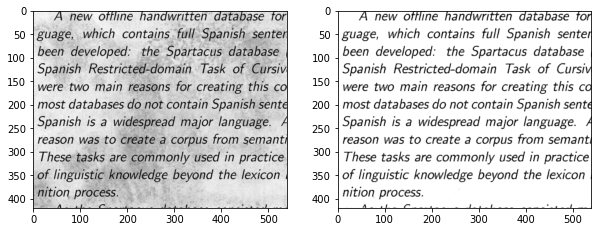

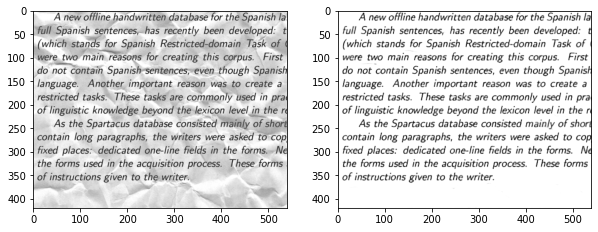

In [0]:
decoded_img = np.squeeze(autoencoder.predict(x_test))

for i in range(2):
  f, ax = plt.subplots(1,2, figsize=(10,8))
  ax[0].imshow(np.squeeze(x_test[i].reshape(420, 540)), cmap='gray')
  ax[1].imshow(decoded_img[i].reshape(420, 540), cmap='gray')
plt.show()

## ***CNN Complex model Model-2***


*   Complex  convolutional neural network of layers 128,64,64 has been used along with the maxpooling layer after each convolutional layer in encoder.
*   Complex  convolutional neural network of layers 64,64,128 has been used along with the upsampling layer after each convolutional layer in decoder.
*   Dropout of 0.2 has been used to avoid the overfitting of the training data.
*   Dynamic lerarning rate is being used which will vary between 1e-2 amd 1e-4.
*   All of the activation ouputs will be batchnormalized using the batch normalization.



In [0]:
input_img = tf.keras.layers.Input(shape=(420, 540, 1))
print(input_img.shape)
#encoder
x = tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.leaky_relu, padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Dropout(rate=0.2)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.leaky_relu, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(64, activation=tf.nn.leaky_relu)(x)
print(x.shape)
#decoder
x = tf.keras.layers.Dense(64, activation=tf.nn.leaky_relu)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.leaky_relu, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.leaky_relu, padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.BatchNormalization()(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
print(decoded.shape)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2), loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

autoencoder.summary()
callback = ReduceLROnPlateau(monitor = 'val_loss', patience = 8, verbose = 1,mode = 'auto', factor = 0.1, min_lr = 1e-4) 

(None, 420, 540, 1)
(None, 210, 270, 64)
(None, 420, 540, 1)
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 420, 540, 1)]     0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 420, 540, 128)     1280      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 210, 270, 128)     0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 210, 270, 128)     0         
_________________________________________________________________
batch_normalization_29 (Batc (None, 210, 270, 128)     512       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 210, 270, 64)      73792     
________________________________________________________________

In [0]:
autoencoder.fit(X_train, y_train, epochs=100, batch_size=3, validation_data=(X_valid, y_valid), callbacks=[callback])

Epoch 1/100
43/43 [==============================] - 4s 99ms/step - loss: 0.0800 - root_mean_squared_error: 0.2828 - val_loss: 0.0471 - val_root_mean_squared_error: 0.2170 - lr: 0.0100
Epoch 2/100
43/43 [==============================] - 4s 96ms/step - loss: 0.0252 - root_mean_squared_error: 0.1587 - val_loss: 0.0760 - val_root_mean_squared_error: 0.2756 - lr: 0.0100
Epoch 3/100
43/43 [==============================] - 4s 95ms/step - loss: 0.0172 - root_mean_squared_error: 0.1311 - val_loss: 0.0739 - val_root_mean_squared_error: 0.2719 - lr: 0.0100
Epoch 4/100
43/43 [==============================] - 4s 95ms/step - loss: 0.0105 - root_mean_squared_error: 0.1026 - val_loss: 0.0587 - val_root_mean_squared_error: 0.2422 - lr: 0.0100
Epoch 5/100
43/43 [==============================] - 4s 95ms/step - loss: 0.0082 - root_mean_squared_error: 0.0904 - val_loss: 0.0505 - val_root_mean_squared_error: 0.2248 - lr: 0.0100
Epoch 6/100
43/43 [==============================] - 4s 95ms/step - loss: 0

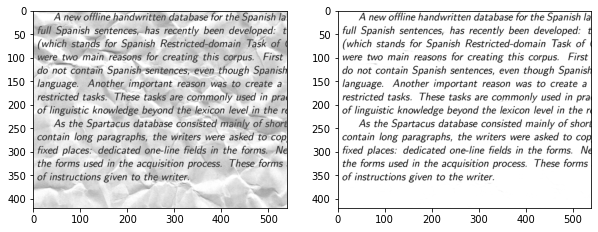

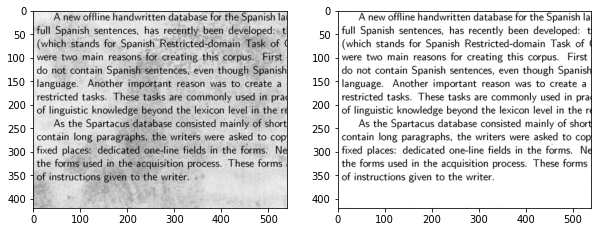

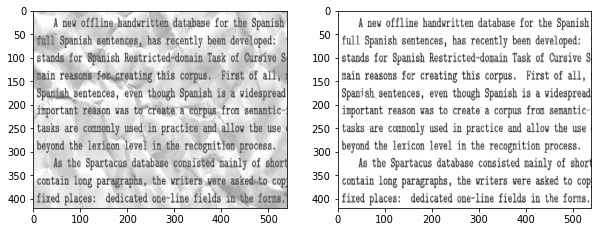

In [0]:
decoded_img = np.squeeze(autoencoder.predict(x_test[1:4]))

for i in range(3):
  f, ax = plt.subplots(1,2, figsize=(10,8))
  ax[0].imshow(np.squeeze(x_test[i+1].reshape(420, 540)), cmap='gray')
  ax[1].imshow(decoded_img[i].reshape(420, 540), cmap='gray')
plt.show()

## ***CNN Complex model Model-3***

*   More Complex  convolutional neural network of layers 256,512,64 has been used along with the maxpooling layer  in encoder.
*   More Complex  convolutional neural network of layers 64,512,256 has been used along with the upsampling layer in decoder.
*   Dropout of 0.2 has been used to avoid the overfitting of the training data.
*   Dynamic lerarning rate is being used which will vary between 1e-2 amd 1e-4.
*   All of the activation ouputs will be batch-normalized using the batch normalization.



In [0]:
input_img = tf.keras.layers.Input(shape=(420, 540, 1))
print(input_img.shape)
#encoder
x = tf.keras.layers.Conv2D(256, (3, 3), activation=tf.nn.leaky_relu, padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Dropout(rate=0.2)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation=tf.nn.leaky_relu, padding='same')(x)
x = tf.keras.layers.Dropout(rate=0.2)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(64, activation=tf.nn.leaky_relu)(x)
print(x.shape)
#decoder
x = tf.keras.layers.Dense(64, activation=tf.nn.leaky_relu)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation=tf.nn.leaky_relu, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(256, (3, 3), activation=tf.nn.leaky_relu, padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.BatchNormalization()(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
print(decoded.shape)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2), loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

autoencoder.summary()
callback = ReduceLROnPlateau(monitor = 'val_loss', patience = 8, verbose = 1,mode = 'auto', factor = 0.1, min_lr = 1e-4) 

(None, 420, 540, 1)
(None, 210, 270, 64)
(None, 420, 540, 1)
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 420, 540, 1)]     0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 420, 540, 256)     2560      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 210, 270, 256)     0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 210, 270, 256)     0         
_________________________________________________________________
batch_normalization_49 (Batc (None, 210, 270, 256)     1024      
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 210, 270, 512)     1180160   
________________________________________________________________

In [0]:
autoencoder.fit(X_train, y_train, epochs=100, batch_size=3, validation_data=(X_valid, y_valid), callbacks=[callback])

Epoch 1/100
43/43 [==============================] - 16s 371ms/step - loss: 0.1069 - root_mean_squared_error: 0.3270 - val_loss: 0.8649 - val_root_mean_squared_error: 0.9300 - lr: 0.0100
Epoch 2/100
43/43 [==============================] - 16s 367ms/step - loss: 0.0457 - root_mean_squared_error: 0.2138 - val_loss: 0.0426 - val_root_mean_squared_error: 0.2063 - lr: 0.0100
Epoch 3/100
43/43 [==============================] - 16s 367ms/step - loss: 0.0281 - root_mean_squared_error: 0.1676 - val_loss: 0.0688 - val_root_mean_squared_error: 0.2624 - lr: 0.0100
Epoch 4/100
43/43 [==============================] - 16s 367ms/step - loss: 0.0169 - root_mean_squared_error: 0.1299 - val_loss: 0.0688 - val_root_mean_squared_error: 0.2623 - lr: 0.0100
Epoch 5/100
43/43 [==============================] - 16s 367ms/step - loss: 0.0137 - root_mean_squared_error: 0.1171 - val_loss: 0.0582 - val_root_mean_squared_error: 0.2413 - lr: 0.0100
Epoch 6/100
43/43 [==============================] - 16s 368ms/st

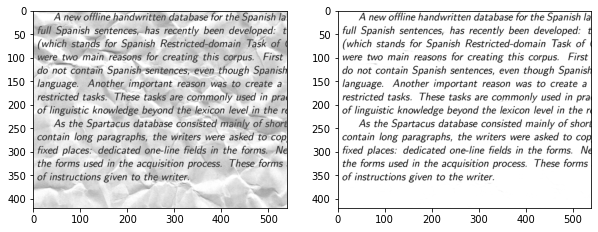

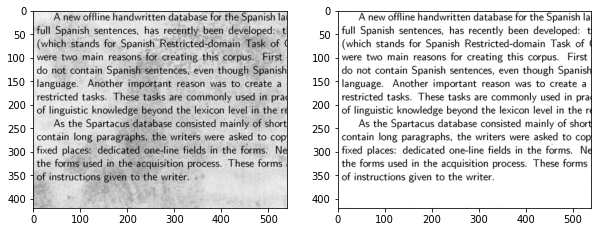

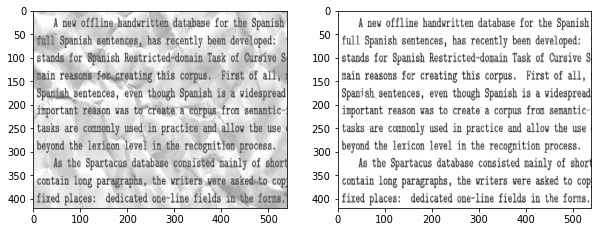

In [0]:
decoded_img = np.squeeze(autoencoder.predict(x_test[1:4]))

for i in range(3):
  f, ax = plt.subplots(1,2, figsize=(10,8))
  ax[0].imshow(np.squeeze(x_test[i+1].reshape(420, 540)), cmap='gray')
  ax[1].imshow(decoded_img[i].reshape(420, 540), cmap='gray')
plt.show()

## ***DENSE LAYER***


*   Encoder with 64 and 32 neuron size is being used.
*   Encoder with 32 and 64 neuron size is being used.
*   Learning rate is being fixed to 1e-4.



In [0]:
# Train your model
X_train_dense = np.reshape(X_train, (len(X_train), 226800))
X_valid_dense = np.reshape(X_valid, (len(X_valid), 226800))
Y_train_dense = np.reshape(y_train, (len(y_train), 226800))
Y_valid_dense = np.reshape(y_valid, (len(y_valid), 226800))
X_test_dense  = np.reshape(x_test, (len(x_test), 226800))

In [0]:
input_img = tf.keras.layers.Input(shape=(226800,)) 

encoding_dim = 64
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img)
encoded = tf.keras.layers.Dense(32, activation='relu')(encoded)

decoded = tf.keras.layers.Dense(32, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(decoded)
decoded = tf.keras.layers.Dense(226800, activation='sigmoid')(decoded)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mse', metrics=[RootMeanSquaredError()])
autoencoder.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 226800)]          0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                14515264  
_________________________________________________________________
dense_28 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_29 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_30 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_31 (Dense)             (None, 226800)            14742000  
Total params: 29,262,512
Trainable params: 29,262,512
Non-trainable params: 0
______________________________________________

In [0]:
autoencoder.fit(X_train_dense, Y_train_dense, epochs=100, batch_size=8, validation_data=(X_valid_dense, Y_valid_dense))

Epoch 1/100
17/17 [==============================] - 0s 21ms/step - loss: 0.1712 - root_mean_squared_error: 0.4183 - val_loss: 0.0756 - val_root_mean_squared_error: 0.2749
Epoch 2/100
17/17 [==============================] - 0s 17ms/step - loss: 0.0738 - root_mean_squared_error: 0.2721 - val_loss: 0.0665 - val_root_mean_squared_error: 0.2579
Epoch 3/100
17/17 [==============================] - 0s 16ms/step - loss: 0.0680 - root_mean_squared_error: 0.2620 - val_loss: 0.0625 - val_root_mean_squared_error: 0.2500
Epoch 4/100
17/17 [==============================] - 0s 16ms/step - loss: 0.0666 - root_mean_squared_error: 0.2576 - val_loss: 0.0629 - val_root_mean_squared_error: 0.2507
Epoch 5/100
17/17 [==============================] - 0s 15ms/step - loss: 0.0664 - root_mean_squared_error: 0.2569 - val_loss: 0.0608 - val_root_mean_squared_error: 0.2466
Epoch 6/100
17/17 [==============================] - 0s 18ms/step - loss: 0.0654 - root_mean_squared_error: 0.2564 - val_loss: 0.0619 - val_

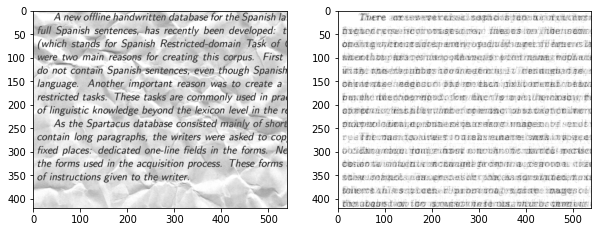

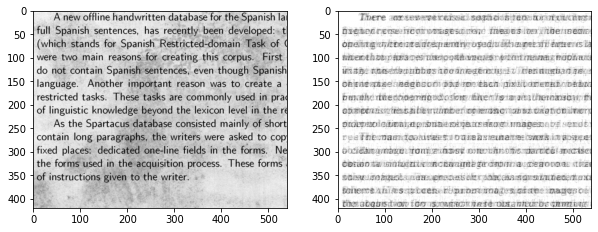

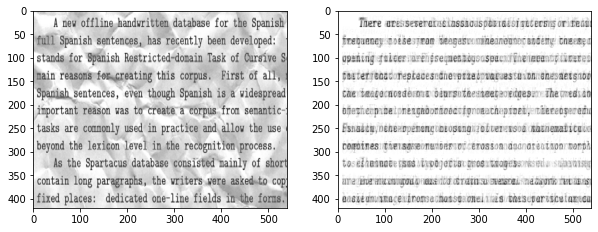

In [0]:
decoded_img = np.squeeze(autoencoder.predict(X_test_dense[1:4]))

for i in range(3):
  f, ax = plt.subplots(1,2, figsize=(10,8))
  ax[0].imshow(np.squeeze(X_test_dense[i+1].reshape(420, 540)), cmap='gray')
  ax[1].imshow(decoded_img[i].reshape(420, 540), cmap='gray')
plt.show()

## ***Comparision between different CNN models:***


*   Based on the number of layers the model3 has the most complex structure. Then comes the model-2 and then basic cnn model-1.
*   The basic model performed well without much complex neurons and batch normalization.
*   Usage of dropout and dynamic learninc rate helped in reducing the RMSE.



## ***Results from Task-3***



*   The dense model, was not able to reconstruct the image. The RMSE reported at the end of the epoch 100 is **val_root_mean_squared_error: 0.1881** The image is quite blurry.
*   CNN- basic model has performed quite effectively in compressing and decompressing the image. The layers of size 64 and 128 along with maxpooling reduced the RMSE to **val_root_mean_squared_error: 0.0832**
*   The CNN most complex model of having layers of size 128,64,64 along with max pooling reduced the RMSE to **val_root_mean_squared_error: 0.0307**



## ***Conclusions from Task-3***


*   The model-2 CNN autoencoder has performed much better than all other CNN models with RMSE value of **0.0307**.
*   The Dense model was not able to capture detailed features while encoding and decoding the text image. The image reconstruction was blurry and not readable.
*   The basic CNN model, although having less complexity in the model was able to rconstruct the image by removing the noise. The image was clear and readable.
*   The pooling layers constructively reduce image size while keeping important features intact which is further decompressed by using upsampling layers.
*   The complex CNN model-2 worked better than Dense and basic CNN model in reconstructing the image. The addition of complex layers created more trainable parameters which in turn lead to a comparitively larger search space.
*   The most complex CNN model-3 has reduced the RMSE to **0.0331**, which infers that the most of the noise is removed from the noisy image in this case as well. 
*   Batch Normalization normalizes output from each activations between 0 and 1. It allows each layer of a network to learn by itself a little bit more independently of other layers.
*   The adaptive learning rate set up has made the process to learn better. It reduces the learning rate y a factor of 0.1 if significant decrease in loss is not seen in consecutive epochs for a set patiene level.
*   Adding dropout in encoder avoided the problem of overfitting in the training process.
*   Leaky ReLU activation function overcomes the problem of it being 0 for negative activations, allowing models to learn faster and perform better.


